In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import SVG, display 
import plotly.io as pio 

from sklearn.base import TransformerMixin 

import spacy

spacy.prefer_gpu()

nlp = spacy.load('en_core_web_md')

In [2]:
df = pd.read_json('winemag-data-130k-v2.json')
df.drop_duplicates(subset=['description'], inplace=True) # Remover duplicados da descrição, pode afetar o resultado do algoritmo
df.dropna(subset=['taster_name'], inplace=True) 

In [3]:
vinhos_mais_caros = df[df['price'].notnull()].reset_index(drop=True).sort_values(by = ['price'],ascending=False).head(10)
vinhos_mais_baratos = df[df['price'].notnull()].reset_index(drop=True).sort_values(by = ['price'],ascending=True).head(10)
avaliadores_mais_comuns_com_twitter = df[df['taster_name'].notnull()].value_counts(['taster_name', 'taster_twitter_handle']).sort_values(ascending=False).rename({'Anne Krebiehl\xa0MW': 'Anne Krebiehl MW'}, axis=0).head(10)
avaliadores_mais_comuns_sem_twitter = df[df['taster_twitter_handle'].isnull()].value_counts(['taster_name']).sort_values(ascending=False).head(10) 
origem_dos_vinhos = df[df['country'].notnull()].value_counts(['country']).sort_values(ascending=False).head(10)
adegas_mais_comuns = df[df['winery'].notnull()].value_counts(['winery']).sort_values(ascending=False).head(10)
x = df['variety'].value_counts().reset_index(name="count")
tipos_vinhos_mais_comuns =  x.query("count > 300").head(10)

In [4]:
class bcolors:
    OKMARGENTA = '\033[35m'
    OKBLUE = "\033[34m"
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    OKYELLOW = '\033[93m'
    OKRED = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [5]:
print(f'Vinhos mais caros: \n')
for i in range(0,len(vinhos_mais_caros)):
    print(f'O vinho {bcolors.BOLD}{bcolors.OKGREEN}{(vinhos_mais_caros.title.iloc[i])}{bcolors.ENDC} da adega {bcolors.BOLD}{vinhos_mais_caros.winery.iloc[i]}{bcolors.ENDC} foi avaliado por {bcolors.BOLD}{bcolors.OKYELLOW}{vinhos_mais_caros.taster_name.iloc[i]}{bcolors.ENDC}, possui nota de {bcolors.BOLD}{vinhos_mais_caros.points.iloc[i]}{bcolors.ENDC} e preço de {bcolors.BOLD}{vinhos_mais_caros.price.iloc[i]}{bcolors.ENDC}')
print('\n')
print(f'\tMédia de notas dos vinhos mais caros: {bcolors.BOLD}{vinhos_mais_caros.points.mean()}{bcolors.ENDC}')
print(f'\tAvaliador mais comum: {bcolors.BOLD}{vinhos_mais_caros.taster_name.value_counts().index[0]}{bcolors.ENDC}')
print(f'\tMédia de preços dos vinhos mais caros: {bcolors.BOLD}{vinhos_mais_caros.price.mean()}{bcolors.ENDC}')

Vinhos mais caros: 

O vinho Château les Ormes Sorbet 2013  Médoc da adega Château les Ormes Sorbet foi avaliado por Roger Voss, possui nota de 88 e preço de 3300.0
O vinho Domaine du Comte Liger-Belair 2010  La Romanée da adega Domaine du Comte Liger-Belair foi avaliado por Roger Voss, possui nota de 96 e preço de 2500.0
O vinho Château Pétrus 2014  Pomerol da adega Château Pétrus foi avaliado por Roger Voss, possui nota de 96 e preço de 2500.0
O vinho Blair 2013 Roger Rose Vineyard Chardonnay (Arroyo Seco) da adega Blair foi avaliado por Matt Kettmann, possui nota de 91 e preço de 2013.0
O vinho Château Pétrus 2011  Pomerol da adega Château Pétrus foi avaliado por Roger Voss, possui nota de 97 e preço de 2000.0
O vinho Domaine du Comte Liger-Belair 2005  La Romanée da adega Domaine du Comte Liger-Belair foi avaliado por Roger Voss, possui nota de 96 e preço de 2000.0
O vinho Château Margaux 2009  Margaux da adega Château Margaux foi avaliado por Roger Voss, possui nota de 98 e preço 

In [6]:
len(df['taster_name'].unique())

19

In [7]:
print(f'Vinhos mais baratos: \n')
for i in range(0,len(vinhos_mais_baratos)):
    print(f'O vinho {bcolors.BOLD}{bcolors.OKGREEN}{(vinhos_mais_baratos.title.iloc[i])}{bcolors.ENDC} da adega {bcolors.BOLD}{vinhos_mais_baratos.winery.iloc[i]}{bcolors.ENDC} foi avaliado por {bcolors.BOLD}{bcolors.OKYELLOW}{vinhos_mais_baratos.taster_name.iloc[i]}{bcolors.ENDC}, possui nota de {bcolors.BOLD}{vinhos_mais_baratos.points.iloc[i]}{bcolors.ENDC} e preço de {bcolors.BOLD}{vinhos_mais_baratos.price.iloc[i]}{bcolors.ENDC}')
print('\n')
print(f'\tMédia de notas dos vinhos mais baratos: {bcolors.BOLD}{vinhos_mais_baratos.points.mean()}{bcolors.ENDC}')
print(f'\tAvaliador mais comum: {bcolors.BOLD}{vinhos_mais_baratos.taster_name.value_counts().index[0]}{bcolors.ENDC}')
print(f'\tMédia de preços dos vinhos mais baratos: {bcolors.BOLD}{vinhos_mais_baratos.price.mean()}{bcolors.ENDC}')

Vinhos mais baratos: 

O vinho Dancing Coyote 2015 White (Clarksburg) da adega Dancing Coyote foi avaliado por Jim Gordon, possui nota de 85 e preço de 4.0
O vinho Broke Ass 2009 Red Malbec-Syrah (Mendoza) da adega Broke Ass foi avaliado por Michael Schachner, possui nota de 84 e preço de 4.0
O vinho Cramele Recas 2011 UnWineD Pinot Grigio (Viile Timisului) da adega Cramele Recas foi avaliado por Anna Lee C. Iijima, possui nota de 86 e preço de 4.0
O vinho Pam's Cuties NV Unoaked Chardonnay (California) da adega Pam's Cuties foi avaliado por Jim Gordon, possui nota de 83 e preço de 4.0
O vinho Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla) da adega Felix Solis foi avaliado por Michael Schachner, possui nota de 85 e preço de 4.0
O vinho Felix Solis 2012 Flirty Bird White (Vino de la Tierra de Castilla) da adega Felix Solis foi avaliado por Michael Schachner, possui nota de 82 e preço de 4.0
O vinho Terrenal 2010 Cabernet Sauvignon (Yecla) da adega Terrenal foi avalia

In [8]:
nomes_avaliadores_com_twitter = []
for i in range(len(avaliadores_mais_comuns_com_twitter.index)):
    nomes_avaliadores_com_twitter.append([avaliadores_mais_comuns_com_twitter.index[i][0]])
nomes_avaliadores_com_twitter = pd.DataFrame(nomes_avaliadores_com_twitter, columns=['taster_name'])

In [9]:
numero_avalicoes_com_twitter = []
for i in range(len(avaliadores_mais_comuns_com_twitter.values)):
    numero_avalicoes_com_twitter.append([avaliadores_mais_comuns_com_twitter.values[i]])
numero_avalicoes_com_twitter = pd.DataFrame(numero_avalicoes_com_twitter, columns=['count'])

In [10]:
avaliadores_mais_comuns = pd.concat([nomes_avaliadores_com_twitter, numero_avalicoes_com_twitter], axis=1)

In [11]:
adegas_mais_comuns_df = pd.DataFrame(adegas_mais_comuns.reset_index(drop=False))
adegas_mais_comuns_df.columns = ['winery', 'count']

In [12]:
avaliadores_mais_comuns_sem_twitter = pd.DataFrame(avaliadores_mais_comuns_sem_twitter.reset_index(drop=False))
avaliadores_mais_comuns_sem_twitter.columns = ['taster_name', 'count']

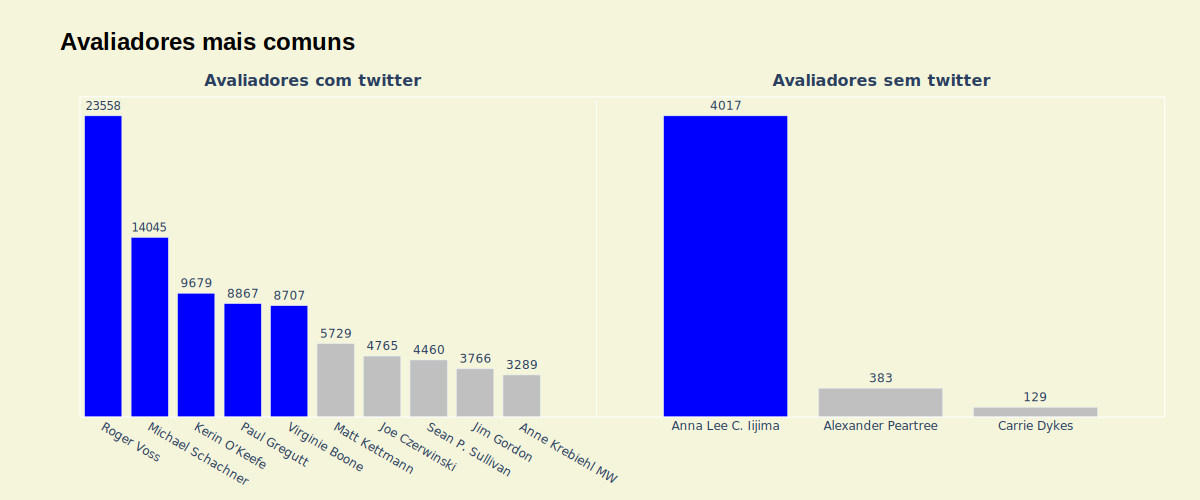

In [13]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('<b>Avaliadores com twitter</b>', '<b>Avaliadores sem twitter</b>'))

colors              = ['#C0C0C0'] * 10
colors[0:5]        = ['blue'] * 5
color_no_twitter    = ['#C0C0C0'] * 3
color_no_twitter[0:1] = ['blue'] * 1

fig.add_trace(go.Bar(
                    y= avaliadores_mais_comuns.sort_values(by = ['count'],ascending=False)['count'] , x= avaliadores_mais_comuns.sort_values(by = ['count'],ascending=False)['taster_name'] , 
                    marker_color=colors,
                    text = avaliadores_mais_comuns.sort_values(by = ['count'],ascending=False)['count'],
 
    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(
                    y= avaliadores_mais_comuns_sem_twitter.sort_values(by = ['count'],ascending=False)['count'], x= avaliadores_mais_comuns_sem_twitter.sort_values(by = ['count'],ascending=False)['taster_name'],
                    marker_color = color_no_twitter, 
                    text = avaliadores_mais_comuns_sem_twitter.sort_values(by = ['count'],ascending=False)['count'],
 
    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(
                
))

fig.update_layout(
                    title='<b>Avaliadores mais comuns</b>', showlegend=False, 
                    yaxis_title=None, xaxis_title=None,
                    paper_bgcolor = 'rgb(245,245,220)', # cor de fundo do papel do gráfico
                    plot_bgcolor = 'rgb(245,245,220)', # cor de fundo do gráfico
                    title_font_family="Arial, monospace",
                    title_font_color="black",
                    title_font_size=24,
                    shapes=[
                            go.layout.Shape(
                            # define o tipo de divisão
                            type='rect', # tipo de divisão via retângulo (rectangle)
                            xref='paper', yref='paper', #referência do retângulo na tela
                            x0=0, y0=0, #posição inicial do retângulo
                            x1=1.05,y1=1.01, #posição final do retângulo
                            line={'width': 1, 'color': 'white'}), # define a cor e a largura da borda do retângulo
                            # define a primeira divisão do gráfico
                            go.layout.Shape(
                            type='line', # tipo de divisão via linha (line)
                            xref='paper', yref='paper',
                            x0=0.5, y0=0,
                            x1=0.5, y1=1,
                            line={'width': 1, 'color': 'white'})])
fig.update_yaxes(visible = False)
fig.update_layout(width = 1200, height = 500)
fig.update_traces(textposition='outside')
for annotation in fig['layout']['annotations']: 
        annotation['yanchor']='top'
        annotation['y']=1.1
        annotation['yref']='paper'

img_bytes_avaliadores = pio.to_image(fig, format="svg")
display(SVG(img_bytes_avaliadores))

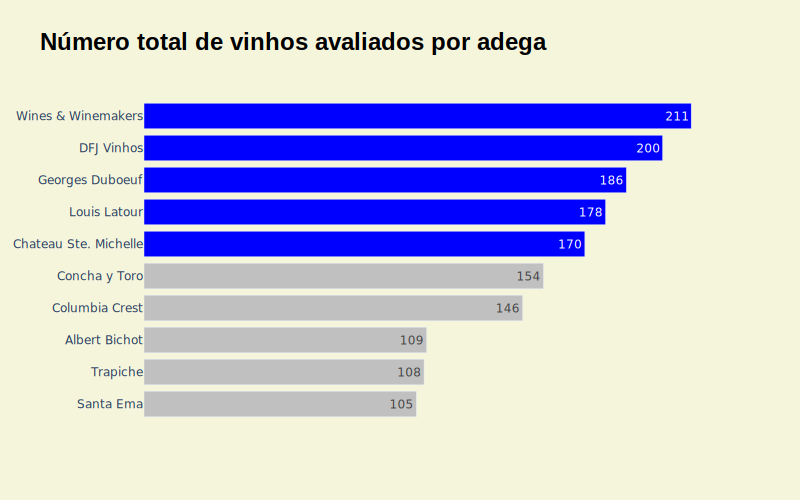

In [14]:
fig = go.Figure()
colors              = ['#C0C0C0'] * 10
colors[5:10]        = ['blue'] * 5
fig.add_trace(go.Bar(
                        y = adegas_mais_comuns_df.sort_values(by=['count'], ascending = True)['winery'], x = adegas_mais_comuns_df.sort_values(by=['count'], ascending = True)['count'],
                        text = adegas_mais_comuns_df.sort_values(by=['count'], ascending = True)['count'],
                        marker_color=colors,
                        orientation = 'h'))
fig.update_layout(
                    title='<b>Número total de vinhos avaliados por adega</b>', showlegend=False, 
                    yaxis_title=None, xaxis_title=None,
                    paper_bgcolor = 'rgb(245,245,220)', # cor de fundo do papel do gráfico
                    plot_bgcolor = 'rgb(245,245,220)', # cor de fundo do gráfico
                    title_font_family="Arial, monospace",
                    title_font_color="black",
                    title_font_size=24)
fig.update_xaxes(visible = False)
fig.update_layout(width = 800, height = 500)
fig.update_traces(textposition='inside')
img_bytes_adegas = pio.to_image(fig, format="svg")
display(SVG(img_bytes_adegas))

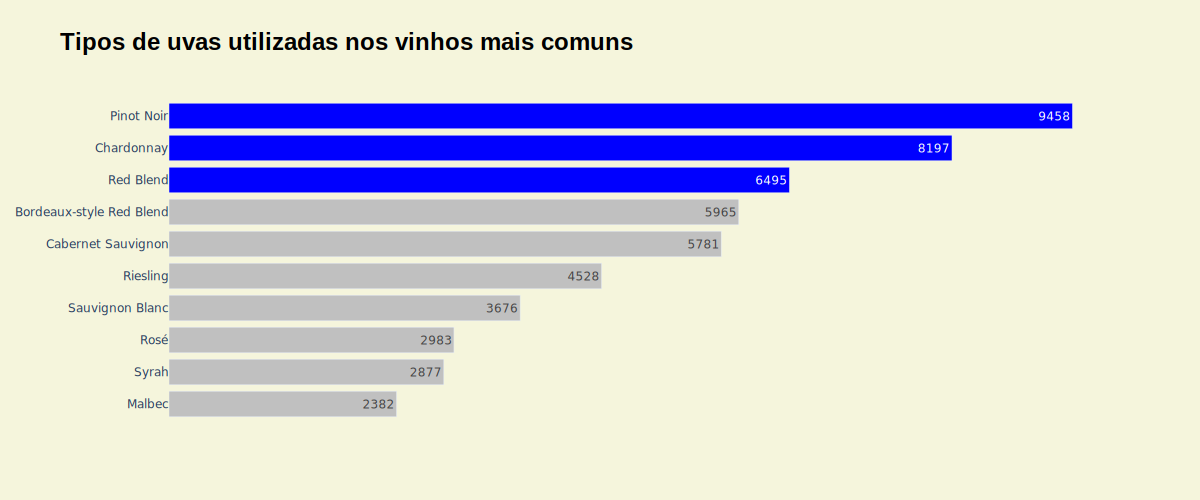

In [15]:
colors = ['#C0C0C0'] * 10
colors[7:10] = ['blue'] * 3
fig = go.Figure(go.Bar(
                x=tipos_vinhos_mais_comuns.sort_values(by = ['count'],ascending=True)['count'], y=tipos_vinhos_mais_comuns.sort_values(by = ['count'],ascending=True)['index'],
                marker_color=colors, text = tipos_vinhos_mais_comuns.sort_values(by = ['count'],ascending=True)['count'],
                orientation = 'h'
)
)

fig.update_layout(
                    title='<b>Tipos de uvas utilizadas nos vinhos mais comuns</b>', showlegend=False, 
                    yaxis_title=None, xaxis_title=None,
                    paper_bgcolor = 'rgb(245,245,220)', # cor de fundo do papel do gráfico
                    plot_bgcolor = 'rgb(245,245,220)', # cor de fundo do gráfico
                    title_font_family="Arial, monospace",
                    title_font_color="black",
                    title_font_size=24
                )
fig.update_xaxes(visible = False)
fig.update_traces(textposition='inside')
fig.update_layout(width = 1200, height = 500)
img_bytes_tipos_vinho = pio.to_image(fig, format="svg")
display(SVG(img_bytes_tipos_vinho))

A análise inicial partiu da necessidade de avaliar os títulos dos vinhos, pois muitos vinhos possuem muitas informações como adega e local de origem (por exemplo, Lisboa, Londres, dentre outros), tornando interessante fazer uma análise a partir dos títulos, porém a descrição se torna mais importante quando citada em uma avaliação de um vinho, pois é possível procurar por "sensações" especificas, generalizando mais o modelo.

A montagem do sistema de recomendação será feito da seguinte maneira:

1. Remoção de nulos da coluna de avaliador, pois uma das informações importantes que serão dadas para a pessoa é o avaliador, e voltar um nulo para a busca é um problema;
2. Remoção dos nulos das colunas escolhidas, as colunas escolhidas são: 'title','description', 'taster_name','variety','winery','points','price'
    1. Title - Rotulo do vinho
    2. Description - Descrição do vinho
    3. Taster name - Nome do avaliador
    4. Variety - Tipo do vinho
    5. Points - Quantidade de pontos atingidos pelo vinho
    6. Price - Preço do vinho
3. Montagem de um sistema de recomendação através da biblioteca spaCy, utilizando a similaridade, oferecida pelo próprio pacote.

In [16]:
nlp_df = df[['title','description', 'taster_name','variety','winery','points','price']]
nlp_df.dropna(inplace=True)
nlp_df.reset_index(drop=True, inplace=True)

c:\Users\augus\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
#Definição das classes de limpeza do texto
class predictors (TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Esta funcao remove espacos em branco no inicio e no fim do texto e converte todo o texto em letras minusculas
def clean_text(texto):
    return texto.strip().lower()

#Esta função seleciona os caracteres que serão selecionados
#Token significa um item da nlp, por exemplo, 'Bom dia' possui dois tokens, 'Bom' e 'dia'.
#is_stop checa se o token é uma stopword (stopwords são definidas como palavras que não possuem importância para o modelo, como por exemplo, preposições, pronome e dentre outros)
#is_punct checa se o token é uma pontuação
#is_space checa se o token possui algum espaço em branco
#like_url checa se o token possui alguma semelhança com alguma url
#is_bracket checa se o token é '[]'
#is_left_punct e is_right_punct checa se o valor possui ( ou ), respectivamente
def tokenizer(texto):
    doc = nlp(texto)
    tokens = [token for token in doc if ((not token.is_stop) & (not token.is_punct) & (not token.is_space) & (not token.is_quote) & (not token.like_url) & (not token.is_bracket) & (not token.is_left_punct) & (not token.is_right_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    doc = nlp(' '.join(tokens))
    return doc

In [18]:
# Criação do modelo de similaridade
def nlp_simmilarity(wine_name):
    
    description = input('O vinho tem alguma descrição? (S/N) ')

    if description.lower() == 's':
        description = input('Digite a descrição: ')
    else:
        description = None
    # Esta função remove espacos em branco no inicio e no fim do texto e converte todo o texto em letras minusculas e tokeniza o texto
    documents_title = []
    documents_wine_name = []
    wine_name = clean_text(wine_name)
    wine_name = tokenizer(wine_name)
    doc = nlp(wine_name)

    # Esse loop é responsável por realizar a similaridade entre o input da função do vinho e todos os vinhos do dataset
    for i in nlp_df['title']:
        # if responsável por verificar se algum vinho já foi avaliado, para não existir duplicatas
        if i in documents_wine_name:
            continue
        else:
            sentence = clean_text(i)
            sentence = tokenizer(sentence)
            sentence = nlp(sentence)
            sim = doc.similarity(sentence)  
            if sim == 1:
                continue
            else:
                documents_title.append(sim)
                documents_wine_name.append(i)

    max_documents_title = []

    # Loop responsável por selecionar os vinhos com maior similaridade
    while len(max_documents_title) != 500:
        max_value = max(documents_title)
        index = documents_title.index(max_value)
        max_documents_title.append([index, max_value])
        documents_title[index] = 0
        
    new_nlp_df = pd.DataFrame(columns=['title','description', 'taster_name','variety','winery','points','price'])

    # Criação de um loop para criar um dataframe com os vinhos selecionados e adicionar a pontução do vinho através da coluna 'title_score'
    for i in range(len(max_documents_title)):
        new_nlp_df = new_nlp_df.append(nlp_df.iloc[max_documents_title[i][0]])
        new_nlp_df['title_score'] = max_documents_title[i][1]
    new_nlp_df.reset_index(drop=True, inplace=True)
    wines = new_nlp_df.sort_values(by = ['title_score'], ascending = False).head(10)
    
    # if responsável por verificar se o usuário imputou alguma descrição
    # a montagem da lógica é bem parecida com a lógica anterior, a única diferença é que ela adiciona tanto a similaridade do titulo como a similaridade da desrição
    if description == None:
        pass
    else:
        description_score = []
        documents_description = []
        description = clean_text(description)
        description = tokenizer(description)
        doc2 = nlp(description)
        for i in new_nlp_df['description']:
            if i in documents_description:
                continue
            else:
                sentence = nlp(i)
                sim = doc2.similarity(sentence)  
                if sim == 1:
                    continue
                else:
                    description_score.append(sim)
                    documents_description.append(i)

        max_description_score = []

        while len(max_description_score) != 100:
            max_value = max(description_score)
            index = description_score.index(max_value)
            max_description_score.append([index,max_value])
            description_score[index] = 0

        new_nlp_df_description = pd.DataFrame(columns=['title','description', 'taster_name','variety','winery','points','price','title_score'])

        for i in range(len(max_description_score)):
            new_nlp_df_description = new_nlp_df_description.append(new_nlp_df.iloc[max_description_score[i][0]])
            new_nlp_df_description['description_score'] = max_description_score[i][1]
        new_nlp_df_description.reset_index(drop=True, inplace=True)
        new_nlp_df = new_nlp_df_description
        wines = new_nlp_df.sort_values(by = ['description_score', 'title_score'], ascending = False).head(10)
        
    # Montagem das strings de recomendação
    if description is None:
        print('Os vinhos recomendados são:')
        for i in range(len(wines)):
            print('\t O vinho recomendado é: ' + f'{bcolors.BOLD}{bcolors.OKGREEN}{wines.title.iloc[i]}{bcolors.ENDC}' + ' com ' + str(round(wines.iloc[i]['title_score'],2)) + ' pontos de similaridade, com valor de ' + str(wines.iloc[i]['price']) + ' doláres e ' + str(wines.iloc[i]['points']) + ' pontos de avaliação com o avaliador ' + wines.iloc[i]['taster_name'] + ' da adega ' + f'{bcolors.BOLD}{bcolors.OKCYAN}{wines.winery.iloc[i]}{bcolors.ENDC}'  + '\n')
    elif description is not None:
        print('Os vinhos recomendados são:')
        for i in range(len(wines)):
            print('\t O vinho recomendado é: ' + f'{bcolors.BOLD}{bcolors.OKGREEN}{wines.title.iloc[i]}{bcolors.ENDC}' + ' com ' + str(round(np.average([wines.iloc[i]['title_score'],wines.iloc[i]['description_score']], weights=[1,3]),2)) + ' pontos de similaridade, com valor de ' + str(wines.iloc[i]['price']) + ' doláres e ' + str(wines.iloc[i]['points']) + ' pontos de avaliação com o avaliador ' + wines.iloc[i]['taster_name'] + ' da adega ' + f'{bcolors.BOLD}{bcolors.OKCYAN}{wines.winery.iloc[i]}{bcolors.ENDC}' + '\n')

In [19]:
nlp_simmilarity('Quinta')

Os vinhos recomendados são:
	 O vinho recomendado é: Previous 2013 Chardonnay (Sonoma County) com 0.65 pontos de similaridade, com valor de 22.0 doláres e 87 pontos de avaliação com o avaliador Virginie Boone da adega Previous

	 O vinho recomendado é: Burnt Bridge 2011 Les Collines Vineyard Merlot (Walla Walla Valley (WA)) com 0.65 pontos de similaridade, com valor de 32.0 doláres e 90 pontos de avaliação com o avaliador Paul Gregutt da adega Burnt Bridge

	 O vinho recomendado é: Karl Schaefer 2013 Sonnentropfen Wachenheimer Feinherb Riesling (Pfalz) com 0.65 pontos de similaridade, com valor de 29.0 doláres e 91 pontos de avaliação com o avaliador Anna Lee C. Iijima da adega Karl Schaefer

	 O vinho recomendado é: MontGras 2014 Antu Syrah (Colchagua Valley) com 0.65 pontos de similaridade, com valor de 23.0 doláres e 90 pontos de avaliação com o avaliador Michael Schachner da adega MontGras

	 O vinho recomendado é: J. Portugal Ramos 2012 F'oz Red (Alentejano) com 0.65 pontos de sim

## Projeto "Wines for U"

O projeto 'Wines for U' apresenta a montagem de um poderoso algoritmo de recomendação utilizando uma biblioteca bem conhecida no mercado chamada spaCy, que disponibiliza funções que realizam a limpeza dos textos e também calculam a semelhança entre os vinhos através do rótulo, outra vantagem que pode ser apresentada através da spaCy é que a biblioteca possui suporte a GPUs, fazendo com que os modelos apresentados possam rodar em plataformas gratuitas e possuírem GPU, como o Google Colab.

O objetivo principal deste projeto é realizar uma generalização dos vinhos não ficando restrito a uma adega especifica, muitas adegas ao redor do mundo possuem sistemas de recomendação dentro de seus *web sites*, porém sempre recomendando vinhos da própria adega (como por exemplo a Catena Zapata), objetivo do algoritmo é generalizar, obter características de vinhos de várias adegas agrupadas na base de dados e realizar a recomendação de várias adegas ao cliente, buscando sempre a diversidade.

O algoritmo se assemelha bastante com o o site "Vivino", que faz a recomendação em cima do vinho, faixa de preço, classificação (nota) e por rótulo. O projeto "Wines for U" trouxe um diferencial, e seu diferencial é a busca de vinhos através de descrição, também, fazendo com que o cliente possa sugerir vinhos através de palavras-chave.

<img src = https://i.imgur.com/O8sIl7C.png>

Fonte: [Vivino](https://www.vivino.com/)


O primeiro passo para a realização do projeto é a construção de gráficos que representam um pouco da base de dados que será estudada, com isso houve a construção de quatro gráficos, os primeiros gráficos representam os avaliadores que mais aparecem, divididos com os avaliadores que possuem *twitter* e os que não possuem *twitter*. O objetivo destes gráficos é destacar os principais avaliadores no banco de dados.

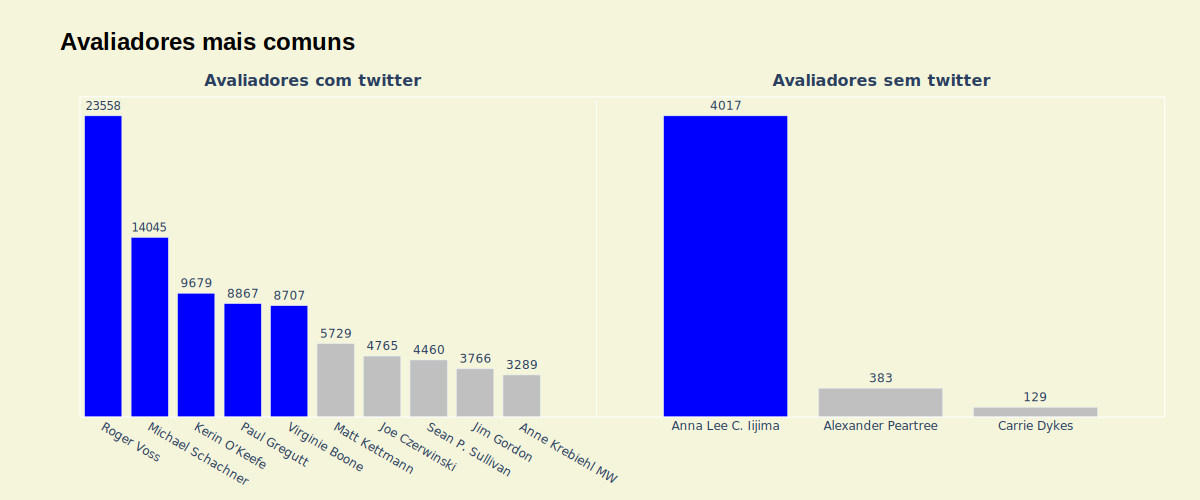

In [20]:
display(SVG(img_bytes_avaliadores))

Com isso, pode-se realizar umas conclusões sobre o gráfico:

1. Roger Voss é um nome que aparece bastante nos dados, pois é um dos principais jornalistas de vinho do mundo, conta com 25 anos de experiência e possui uma série de livros sobre reviews de vinho.
2. Michel Schachner é o segundo nome que mais aparece no gráfico, responsável por várias análises de vinhos baratos;
3. Kerin O’Keefe é uma referência na avaliação de vinhos italianos, responsável por escrever 4 livros sobre crítica de vinhos;
4. Paul Gregutt é um crítico de vinho responsável por avaliar vinhos nas regiões do nordeste do pacífico e na Califórnia;
5. Virginie Boone é muito focada em vinhos da Califórnia e escreve com frequência em artigos do *New York Times*
6. Anna Lee C. Iijima aparece com predominância dos nomes que não possuem *twitter* mas é uma estudante no mestrado do *Wine Program*

É possível dizer que os dados estudados tem bastante embasamento e muitos nomes impactantes para o mercado de vinhos, fora essas 6 referências mundiais é possível verificar avaliações de mais 13 avaliadores.

O próximo gráfico conta com a quantidade de adegas que fazem parte dos dados. Uma coisa interessante a se notar é que a quantidade de vinhos avaliada por adega está relativamente bem distribuída, não existem picos como no gráfico dos avaliadores que não possuem *twitter* e dentro das adegas apresentadas, existem famosas adegas como exemplo a Wines & Winemakers, adega portuguesa e Georges Duboeuf que é uma distribuidora de vinhos francesa.

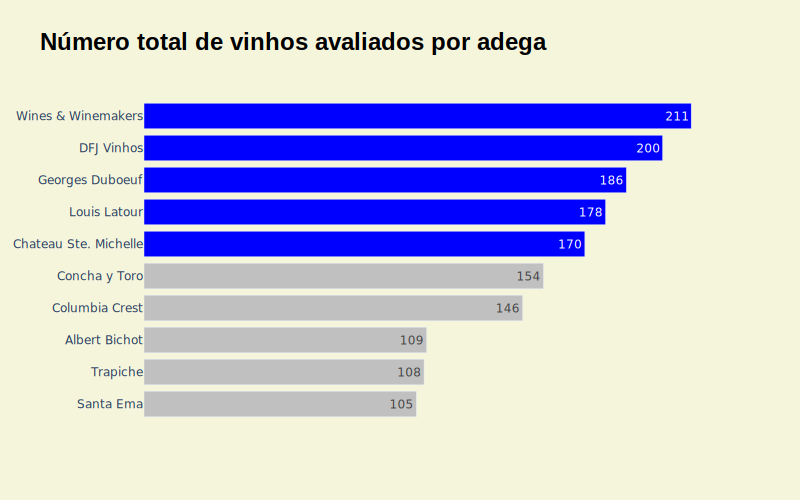

In [21]:
display(SVG(img_bytes_adegas))

Outra coisa interessante a ser notada é o tipo de uvas dos vinhos na base de dados, com isso tem-se:

1. Pinot Noir - Vinhos produzidos com uvas roxas, que fazem parte de uma quantidade abundante de vinhos;
2. Chardonnay - São vinhos produzidos a partir da "uva-branca", bem comum em vinhos tintos;
3. Red Blend - Vinhos desenvolvidos através de uma mistura de várias uvas;

Fora esses três tipos de vinhos, é possível perceber que existe uma grande variedade de vinhos nos dados.

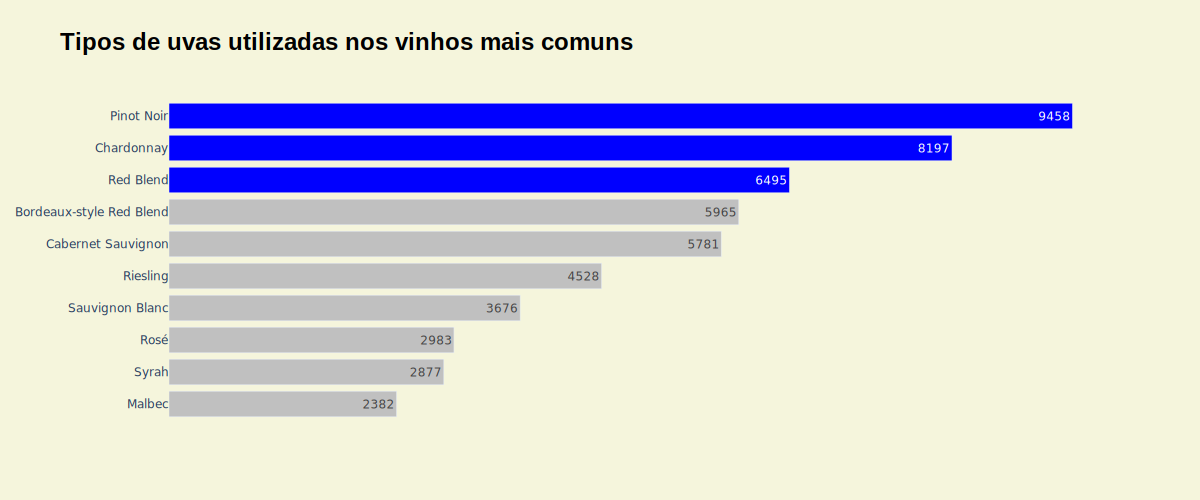

In [22]:
display(SVG(img_bytes_tipos_vinho))

Os dados também contam com vinhos das mais diferentes faixas de preço, como pode-se notar, os vinhos mais caros tem, em sua maioria, notas muito elevadas e avaliadas, em sua maioria, pelo avaliador Roger Voss. Existe uma exceção nos vinhos, dentro dos 10 vinhos mais caros, o vinho mais caro possui uma nota bem inferior à média dos vinhos mais caros, vale destacar que existem vinhos com a nota máxima nos dados que foram estudos.

In [23]:
print(f'Vinhos mais caros: \n')
for i in range(0,10):
    print(f'O vinho {bcolors.BOLD}{bcolors.OKGREEN}{(vinhos_mais_caros.title.iloc[i])}{bcolors.ENDC} da adega {bcolors.BOLD}{vinhos_mais_caros.winery.iloc[i]}{bcolors.ENDC} foi avaliado por {bcolors.BOLD}{bcolors.OKYELLOW}{vinhos_mais_caros.taster_name.iloc[i]}{bcolors.ENDC}, possui nota de {bcolors.BOLD}{vinhos_mais_caros.points.iloc[i]}{bcolors.ENDC} e preço de {bcolors.BOLD}{vinhos_mais_caros.price.iloc[i]}{bcolors.ENDC}')
print('\n')
print(f'\tMédia de notas dos vinhos mais caros: {bcolors.BOLD}{vinhos_mais_caros.points.mean()}{bcolors.ENDC}')
print(f'\tAvaliador mais comum: {bcolors.BOLD}{vinhos_mais_caros.taster_name.value_counts().index[0]}{bcolors.ENDC}')
print(f'\tMédia de preços dos vinhos mais caros: {bcolors.BOLD}{vinhos_mais_caros.price.mean()}{bcolors.ENDC}')

Vinhos mais caros: 

O vinho Château les Ormes Sorbet 2013  Médoc da adega Château les Ormes Sorbet foi avaliado por Roger Voss, possui nota de 88 e preço de 3300.0
O vinho Domaine du Comte Liger-Belair 2010  La Romanée da adega Domaine du Comte Liger-Belair foi avaliado por Roger Voss, possui nota de 96 e preço de 2500.0
O vinho Château Pétrus 2014  Pomerol da adega Château Pétrus foi avaliado por Roger Voss, possui nota de 96 e preço de 2500.0
O vinho Blair 2013 Roger Rose Vineyard Chardonnay (Arroyo Seco) da adega Blair foi avaliado por Matt Kettmann, possui nota de 91 e preço de 2013.0
O vinho Château Pétrus 2011  Pomerol da adega Château Pétrus foi avaliado por Roger Voss, possui nota de 97 e preço de 2000.0
O vinho Domaine du Comte Liger-Belair 2005  La Romanée da adega Domaine du Comte Liger-Belair foi avaliado por Roger Voss, possui nota de 96 e preço de 2000.0
O vinho Château Margaux 2009  Margaux da adega Château Margaux foi avaliado por Roger Voss, possui nota de 98 e preço 

Já os vinhos que são mais baratos tem uma gama maior de avaliadores, porém o nome mais predominante foi o de Michael Schachner e as notas também são baixas, considerando que a menor nota é 80, esperado por serem vinhos mais baratos, espera-se que elas possuam uma qualidade inferior aos vinhos mais caros.

In [24]:
print(f'Vinhos mais baratos: \n')
for i in range(0,10):
    print(f'O vinho {bcolors.BOLD}{bcolors.OKGREEN}{(vinhos_mais_baratos.title.iloc[i])}{bcolors.ENDC} da adega {bcolors.BOLD}{vinhos_mais_baratos.winery.iloc[i]}{bcolors.ENDC} foi avaliado por {bcolors.BOLD}{bcolors.OKYELLOW}{vinhos_mais_baratos.taster_name.iloc[i]}{bcolors.ENDC}, possui nota de {bcolors.BOLD}{vinhos_mais_baratos.points.iloc[i]}{bcolors.ENDC} e preço de {bcolors.BOLD}{vinhos_mais_baratos.price.iloc[i]}{bcolors.ENDC}')
print('\n')
print(f'\tMédia de notas dos vinhos mais baratos: {bcolors.BOLD}{vinhos_mais_baratos.points.mean()}{bcolors.ENDC}')
print(f'\tAvaliador mais comum: {bcolors.BOLD}{vinhos_mais_baratos.taster_name.value_counts().index[0]}{bcolors.ENDC}')
print(f'\tMédia de preços dos vinhos mais baratos: {bcolors.BOLD}{vinhos_mais_baratos.price.mean()}{bcolors.ENDC}')

Vinhos mais baratos: 

O vinho Dancing Coyote 2015 White (Clarksburg) da adega Dancing Coyote foi avaliado por Jim Gordon, possui nota de 85 e preço de 4.0
O vinho Broke Ass 2009 Red Malbec-Syrah (Mendoza) da adega Broke Ass foi avaliado por Michael Schachner, possui nota de 84 e preço de 4.0
O vinho Cramele Recas 2011 UnWineD Pinot Grigio (Viile Timisului) da adega Cramele Recas foi avaliado por Anna Lee C. Iijima, possui nota de 86 e preço de 4.0
O vinho Pam's Cuties NV Unoaked Chardonnay (California) da adega Pam's Cuties foi avaliado por Jim Gordon, possui nota de 83 e preço de 4.0
O vinho Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla) da adega Felix Solis foi avaliado por Michael Schachner, possui nota de 85 e preço de 4.0
O vinho Felix Solis 2012 Flirty Bird White (Vino de la Tierra de Castilla) da adega Felix Solis foi avaliado por Michael Schachner, possui nota de 82 e preço de 4.0
O vinho Terrenal 2010 Cabernet Sauvignon (Yecla) da adega Terrenal foi avalia

- Porque as soluções da “Wine for U” são as melhores?

Fora a quantidade grande de dados que estão nos bancos de dados, o projeto contou com a montagem do sistema de recomendação seguindo dois principios básicos:

1. O título de um vinho geralmente traz muitas informações sobre sua origem, como cidade de origem, tipo de uva utilizada e um nome que caracteriza vários vinhos;
2. A descrição traz características únicas que o vinho pode oferecer aos consumidores, como aroma, sabor e dentre outros.

Através desses dois princípios foi possível realizar um sistema de recomendação em que dado o título do vinho, acontece uma busca na base de dados buscando a similaridade entre os títulos, caso seja preenchido uma descrição do vinho o processo será idêntico caso seja dado apenas o título do vinho.

- Possíveis aperfeiçoamentos futuros

1. Refinamento da função de recomendação, considerando o avaliador, nota e preço dos vinhos.
2. Utilização de outras bibliotecas para aumentar a desempenho do sistema de recomendação.
3. Coletar mais dados para aumentar a interpretação do sistema de recomendação.
